# <span style="color:red; font-size:30px;">Logistics regression</span>

# <span style="color:red; font-size:30px;">Introduction</span>

In this notebook, we will delve into binomial logistic regression, employing this method to predict a dependent variable based on one independent variable. 


The airline industry seeks insights into whether an enhanced **in-flight entertainment** experience correlates with heightened **customer satisfaction.** They've tasked us with constructing and assessing a model capable of predicting whether prospective customers would be content with their services, leveraging past customer feedback on their flight experiences.

Our dataset encompasses information from 1**29,880 customers**, featuring variables such as **class, flight distance, and in-flight entertainment**, among others. Our objective is to employ **binomial logistic regression** to model and gain deeper insights into this dataset for the airline's benefit.

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:20px;
             text-align:center;
               border-radius:30px 80px;
             font-weight:bold;
             border:2px solid yellow;
             padding:5px 30px;">1. Importing Libraries and loading datasets
</span>


In [1]:
# Standard operational package imports.
import numpy as np
import pandas as pd

# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=100
pd.options.display.max_rows=100

In [2]:
df = pd.read_csv('/kaggle/input/airline-customer-satisfaction/Airline_customer_satisfaction.csv')

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:20px;
             text-align:center;
               border-radius:40px 90px;
             font-weight:bold;
             border:2px solid yellow;
             padding:15px 50px;">2. Data Exploration (Initial EDA and data cleaning)
</span>


In [3]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [5]:
df.shape

(129880, 22)

### <span style="color:red; font-size:20px;">Checking the number of satisfied customers in the dataset</span>

In [6]:
value_counts = df['satisfaction'].value_counts(dropna=False)
value_counts

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

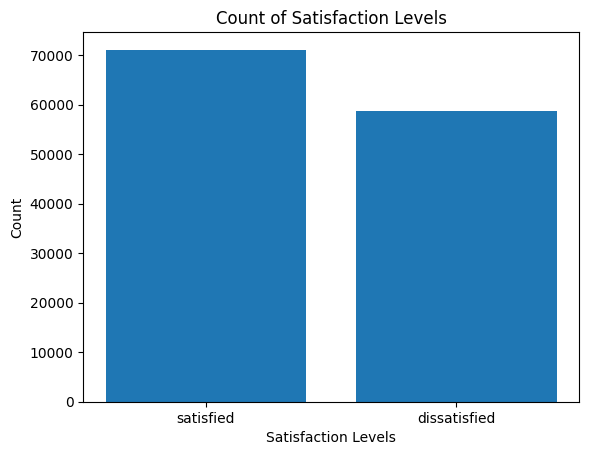

In [7]:
# Plotting the counts
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Satisfaction Levels')
plt.ylabel('Count')
plt.title('Count of Satisfaction Levels')
plt.show()

### <span style="color:red; font-size:20px;">Checking missing values</span>

In [8]:
df.isna().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Customer Type                          0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Inflight wifi service                  0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Inflight entertainment                 0
dtype: int64

Since there are only **393 missing values**, which represent a **small percentage of the dataset**, it seems reasonable to remove these rows.

### <span style="color:red; font-size:20px;">Preparing the data</span>


In the upcoming steps, we'll need to create a plot of our model to visualize the results. Therefore, the independent variable **"Inflight entertainment"** cannot be of type **integer**, and the dependent variable **"satisfaction"** cannot be of type **object.**

In [9]:
df1 = df.dropna(axis=0).reset_index(drop = True)

In [10]:
df1['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df1[['satisfaction']]).toarray()

In [11]:
df1

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1.0,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129483,0.0,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129484,0.0,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129485,0.0,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


### <span style="color:red; font-size:20px;">Creating the training and testing data</span>


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
df1['Type of Travel'].value_counts()

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

In [14]:
df1['Customer Type'].value_counts()

Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64

In [15]:
df1['Class'].value_counts()

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

In [16]:
## One hot encoding for the customer type
df1['Customer Type'] = OneHotEncoder(drop='first').fit_transform(df1[['Customer Type']]).toarray()
df1

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,0.0,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0.0,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0.0,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0.0,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1.0,1.0,29,Personal Travel,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129483,0.0,1.0,63,Personal Travel,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129484,0.0,1.0,69,Personal Travel,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129485,0.0,1.0,66,Personal Travel,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [17]:
df1['Type of Travel'] = OneHotEncoder(drop='first').fit_transform(df1[['Type of Travel']]).toarray()
df1

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,65,1.0,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,0.0,47,1.0,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0.0,15,1.0,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0.0,60,1.0,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0.0,70,1.0,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,1.0,1.0,29,1.0,Eco,1731,5,5,5,3,2,5,2,2,3,3,4,4,4,2,0,0.0
129483,0.0,1.0,63,1.0,Business,2087,2,3,2,4,2,1,1,3,2,3,3,1,2,1,174,172.0
129484,0.0,1.0,69,1.0,Eco,2320,3,0,3,3,3,2,2,4,4,3,4,2,3,2,155,163.0
129485,0.0,1.0,66,1.0,Eco,2450,3,2,3,2,3,2,2,3,3,2,3,2,1,2,193,205.0


In [18]:
df1['Type of Travel'].value_counts()

Type of Travel
0.0    89445
1.0    40042
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
## label encoding for the Embarked as it contains 3 values
label_encoder = LabelEncoder()

# Fit and transform the 'Embarked' column
df1['Class'] = label_encoder.fit_transform(df1['Class'])

df1.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,65,1.0,1,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,1.0,0.0,47,1.0,0,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,1.0,0.0,15,1.0,1,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,1.0,0.0,60,1.0,1,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,1.0,0.0,70,1.0,1,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [20]:
y=df1['satisfaction']
X=df1.drop('satisfaction',axis=1)

In [21]:
scaler.fit(X)

StandardScaler()

In [22]:
scaled_data=scaler.transform(X)

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

In [24]:
data_pca=pca.fit_transform(scaled_data)

In [25]:
X=data_pca
X

array([[2.69113882],
       [3.43076359],
       [3.2298903 ],
       ...,
       [1.93326605],
       [3.383859  ],
       [0.19812187]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


<span style="background-color:deepskyblue;
             color:yellow;
             font-size:20px;
             text-align:center;
               border-radius:40px 90px;
             font-weight:bold;
             border:2px solid yellow;
             padding:15px 50px;">3. Model building
</span>

### <span style="color:red; font-size:20px;">Fit a LogisticRegression model to the data using pca
</span>


In [27]:
clf = LogisticRegression().fit(X_train,y_train)

# <span style="color:red; font-size:20px;">Obtain parameter estimates</span>


In [28]:
clf.coef_

array([[-0.79421854]])

In [29]:
clf.intercept_

array([0.2323425])

<span style="background-color:deepskyblue;
             color:yellow;
             font-size:20px;
             text-align:center;
               border-radius:40px 90px;
             font-weight:bold;
             border:2px solid yellow;
             padding:15px 50px;">4. Results and evaluation
</span>

# <span style="color:red; font-size:20px;">Predicting the outcome for the test dataset</span>

Now that we've finished our regression, let's review and analyze the results. First, we'll input the holdout dataset into the `predict` function to obtain the predicted labels from the model.

In [30]:
# SavING predictions.

y_pred = clf.predict(X_test)

# <span style="color:red; font-size:20px;">Printing out y_pred</span>

In order to examine the predictions, print out `y_pred`.

In [31]:
print(y_pred)

[1. 1. 0. ... 0. 1. 1.]


# <span style="color:red; font-size:20px;">Using the `predict_proba` and `predict` functions on `X_test</span>


In [32]:
clf.predict_proba(X_test)

array([[0.12491416, 0.87508584],
       [0.30207486, 0.69792514],
       [0.92957478, 0.07042522],
       ...,
       [0.89380834, 0.10619166],
       [0.22881961, 0.77118039],
       [0.33116454, 0.66883546]])

In [33]:
# Using predict to output 0's and 1's.

clf.predict(X_test)

array([1., 1., 0., ..., 0., 1., 1.])

# <span style="color:red; font-size:20px;">Analyse the results</span>

In [34]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.766211
Precision: 0.771202
Recall: 0.812948
F1 Score: 0.791525


## <span style="color:red; font-size:20px;">Producing a confusion matrix</span> 

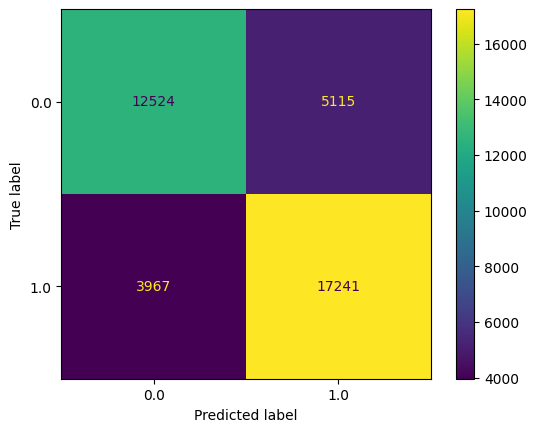

In [35]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot()
plt.show()

# <span style="color:red; font-size:25px;">Considerations</span>

* **False positives and False negative** values relatively low under **5500.**

* The **true positives and true negatives** —are both high numbers above **12,000.** 

* There isn't a large difference in the number of **false positives and false negatives.**

* Logistic regression accurately predicted satisfaction **76.57 percent** of the time

* The model is **76.57 percent accurate.** This is an improvement over the dataset's **customer satisfaction rate of 54.7 percent.**

* **The success of the model suggests that the airline should invest more in model developement to examine if adding more independent variables leads to better results.**


